In [2]:
import urllib.request

url = "https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat"
response = urllib.request.urlopen(url)
data = response.read()

In [3]:
file = open("airports_db.dat", "wb")
file.write(data)
file.close()

In [4]:
import csv

f = open("airports_db.dat", encoding = "utf8")
airport_db = [] #main arrar for airport
errors = 0
for airport in csv.reader(f, delimiter = ','):
    current_record = []
    try:
        #each slots containing information about an airport
        current_record.append(int(airport[0])) #airport ID
        current_record.append(airport[1]) 
        current_record.append(airport[2])
        current_record.append(airport[3])
        current_record.append(airport[4])
        current_record.append(airport[5])
        current_record.append(float(airport[6]))
        current_record.append(float(airport[7]))
        current_record.append(float(airport[8]))
        current_record.append(float(airport[9]))
        current_record.append(airport[10])
        current_record.append(airport[11])
        current_record.append(airport[12])
        current_record.append(airport[13])
    except : 
        errors += 1
    else:
        airport_db.append(current_record)
print("Total Airport Imported : ", len(airport_db), "# of Errors : ", errors)
    

Total Airport Imported :  6874 # of Errors :  310


In [5]:
url = "https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat"
response= ""
data = ""
response = urllib.request.urlopen(url)
data = response.read()

file = open("routes_db.dat", "wb")
file.write(data)
file.close()

In [6]:
f = open("routes_db.dat", encoding = "utf8")
route_db = []
errors = 0
for route in csv.reader(f, delimiter = ','):
    current_record = []
    try:
        current_record.append(route[0]) 
        current_record.append(int(route[1]))
        current_record.append(int(route[3]))
        current_record.append(int(route[5]))
        current_record.append(int(route[7]))
        current_record.append(route[8])
  
    except : 
        errors += 1
    else:
        route_db.append(current_record)
print("Total Routes Imported : ", len(route_db), "# of Errors : ", errors)

Total Routes Imported :  66765 # of Errors :  898


In [7]:
import networkx as nx
network = nx.Graph()

In [8]:
for airport in airport_db:
    network.add_node(airport[0], id=airport[0], name=airport[1], city=airport[2], country=airport[3], iata=airport[4], 
                     icao=airport[5],
                     lat=airport[6], 
                     long=airport[7], alt=airport[8], offset=airport[9], 
                     daylight=airport[10], timezone=airport[11], type=airport[12], source=airport[13])

In [9]:
for route in route_db:
    if route[2] in network.nodes() and route[3] in network.nodes:
        network.add_edge(route[2], route[3], airline = route[0], airline_id = route[1], stops = route[4], equipment = route[5])

In [60]:
network.nodes[193]


{'id': 193,
 'name': 'Lester B. Pearson International Airport',
 'city': 'Toronto',
 'country': 'Canada',
 'iata': 'YYZ',
 'icao': 'CYYZ',
 'lat': 43.6772003174,
 'long': -79.63059997559999,
 'alt': 569.0,
 'offset': -5.0,
 'daylight': 'A',
 'timezone': 'America/Toronto',
 'type': 'airport',
 'source': 'OurAirports',
 'degree_centrality': 0.02138804015713662,
 'coordinates': (-79.63059997559999, 43.6772003174),
 'color': 'green',
 'importance': 150}

In [59]:
network.edges[193,100]

{'airline': 'WS',
 'airline_id': 5416,
 'stops': 0,
 'equipment': '736 73W',
 'color': 'grey',
 'size': 0.2}

In [14]:
network.nodes[100]

{'id': 100,
 'name': 'Ottawa Macdonald-Cartier International Airport',
 'city': 'Ottawa',
 'country': 'Canada',
 'iata': 'YOW',
 'icao': 'CYOW',
 'lat': 45.3224983215332,
 'long': -75.66919708251953,
 'alt': 374.0,
 'offset': -5.0,
 'daylight': 'A',
 'timezone': 'America/Toronto',
 'type': 'airport',
 'source': 'OurAirports'}

In [53]:
for i in list(network.neighbors(193)):
    print(network.nodes[i]['id'], " -  ", network.nodes[i]["name"])

302  -   Brussels Airport
3876  -   Charlotte Douglas International Airport
3520  -   Ronald Reagan Washington National Airport
3670  -   Dallas Fort Worth International Airport
3797  -   John F Kennedy International Airport
3877  -   McCarran International Airport
3484  -   Los Angeles International Airport
3697  -   La Guardia Airport
507  -   London Heathrow Airport
3878  -   Orlando International Airport
3576  -   Miami International Airport
3830  -   Chicago O'Hare International Airport
3752  -   Philadelphia International Airport
2874  -   V.C. Bird International Airport
3682  -   Hartsfield Jackson Atlanta International Airport
2895  -   Queen Beatrix International Airport
2179  -   Abu Dhabi International Airport
5810  -   Samaná El Catey International Airport
1218  -   Barcelona International Airport
4069  -   L.F. Wade International International Airport
3825  -   Bradley International Airport
2875  -   Sir Grantley Adams International Airport
3690  -   Nashville Internationa

In [54]:
network.edges[193,3830]

{'airline': 'WS',
 'airline_id': 5416,
 'stops': 0,
 'equipment': 'E75',
 'color': 'grey',
 'size': 0.2}

In [55]:
nx.info(network, 193)
#basic information about neighboring nodes,This will pull up the degree of the node along with the ids of its neighbor
#The degree of a node is basically the number of edges attached to it.


'Node 193 has the following properties:\nDegree: 147\nNeighbors: 302 3876 3520 3670 3797 3877 3484 3697 507 3878 3576 3830 3752 2874 3682 2895 2179 5810 1218 4069 3825 2875 3690 2709 3448 3849 1901 1382 3486 3759 609 1852 3488 3751 3645 599 3494 1555 3533 340 1926 1941 2882 2564 1909 3077 1910 3714 3550 3585 1701 1779 2789 1881 1780 3458 3542 1824 3717 3858 3861 346 1953 2279 3364 3462 3570 1754 1761 1760 3406 3626 3622 3793 3731 2650 3577 3469 1885 1918 3678 3745 1590 3646 2894 1613 1923 679 21 45 49 56 61 73 90 100 111 113 117 120 121 126 133 135 143 146 156 160 166 174 177 178 182 184 189 199 1678 1892 2276 4304 2902 1871 1904 580 2188 1107 16 3930 1128 2223 2206 2207 1638 1636 1633 2985 2072 3941 534 502 478 1551 2988 3515 2890 2899 87'

In [18]:
nx.density(network)
#check the density of our network by using the density function .density(graph)

0.0007805270068567253

In [19]:
#In order to have a good result, the graph should be  fully connected. 
#We can check is your network is fully connected by using the .is_connected(graph) function. 
#It will return a boolean response.
nx.is_connected(network)

False

In [20]:
#compute the centrality of a network
#centrality as a measure of the importance of each node in the network
#the higher the centrality of a node is, the more important role it plays in a network
degree_centrality = nx.degree_centrality(network)


In [21]:
#In Networkx, you can easily add new information to our nodes. 
#add the centrality values to our nodes. 
#loop through the degree centrality values we calculated above (dictionary), and we will add them to their corresponding nodes
for airport, centrality_value in degree_centrality.items():
    network.nodes[airport]['degree_centrality'] = centrality_value

In [56]:
network.nodes[193]['degree_centrality']

0.02138804015713662

In [74]:
#check the path between two nodes using the has_path function. 
nx.has_path(network, source=193, target = 20)

NodeNotFound: Either source 193 or target 20 is not in G

In [63]:
nx.has_path(network, source= 193, target = 100)

True

In [25]:
#Right now we have a network that is not fully connected. 
#That probably means that there are some nodes that do not have edges.
#double check that we can print out the degree of each node.
#You can think of the degree of a node as the number of edges a node has. We can simply use the .degree function for that.
network.degree()


DegreeView({1: 4, 2: 7, 3: 9, 4: 9, 5: 32, 6: 4, 7: 5, 8: 8, 9: 7, 10: 1, 11: 1, 12: 1, 13: 0, 14: 0, 15: 1, 16: 34, 17: 0, 18: 4, 19: 0, 20: 0, 21: 4, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 3, 28: 1, 29: 4, 30: 3, 31: 1, 32: 4, 33: 2, 34: 2, 35: 0, 36: 0, 37: 3, 38: 0, 39: 0, 40: 2, 41: 4, 42: 0, 43: 0, 44: 0, 45: 4, 46: 0, 47: 0, 48: 0, 49: 35, 50: 3, 51: 0, 52: 0, 53: 0, 54: 2, 55: 10, 56: 4, 57: 0, 58: 3, 59: 0, 60: 1, 61: 1, 62: 0, 63: 2, 64: 0, 65: 1, 66: 0, 67: 4, 68: 1, 69: 3, 70: 4, 71: 0, 72: 3, 73: 32, 74: 0, 75: 2, 76: 0, 77: 0, 78: 2, 79: 2, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 10, 88: 0, 89: 0, 90: 7, 91: 0, 92: 0, 93: 0, 94: 3, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 26, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 2, 107: 0, 108: 1, 109: 2, 110: 0, 111: 13, 112: 3, 113: 3, 114: 0, 115: 3, 116: 1, 117: 7, 119: 4, 120: 9, 121: 10, 122: 2, 123: 0, 124: 0, 125: 3, 126: 2, 127: 2, 128: 2, 129: 0, 130: 0, 131: 0, 132: 11, 133: 6, 134: 0, 135: 3, 136: 4, 137: 0

In [64]:
# a lot of our nodes do not have edges attached to them. 
#remove all the nodes that have 0 as the degree.
for airport, degree in list(network.degree()):
    if degree == 0:
        network.remove_node(airport)

In [65]:
nx.info(network)

'Name: \nType: Graph\nNumber of nodes: 3102\nNumber of edges: 18438\nAverage degree:  11.8878'

In [32]:
#After removing all nodes with no connection, 
#we still have an unconnected graph. evaluate the subgraphs within our graph.

nx.number_connected_components(network)

7

In [66]:
[len(e) for e in nx.connected_components(network)]

[3077, 10, 4, 3, 2, 2, 4]

In [67]:
#there is a subnetwork containing the bulk of our airports (3077) 
#small subnetwork that are not connected to the main one. Since they are not a lot, we can easily disregard those values. 
#save the subgraph 3077 in a new variable that will be used to display the network
main_subgraph = max(nx.connected_components(network), key= len)

In [68]:
network_main = network.subgraph(main_subgraph)

In [69]:
nx.info(network_main)

'Name: \nType: SubGraph\nNumber of nodes: 3077\nNumber of edges: 18414\nAverage degree:  11.9688'

In [70]:
nx.is_connected(network_main)


True

In [71]:
#The subnetwork is fully connected, now we can go ahead and visualize the data

In [72]:
import matplotlib.pyplot as plt

In [73]:
#First, we will add a new label called coordinates to our nodes. 
#The coordinates will be a tuple containing the latitude and the longitude of our nodes.
for airport in network_main.nodes():
    network_main.node[airport]['coordinates'] = (network_main.node[airport]['long'],
                                                 network_main.node[airport]['lat'] )

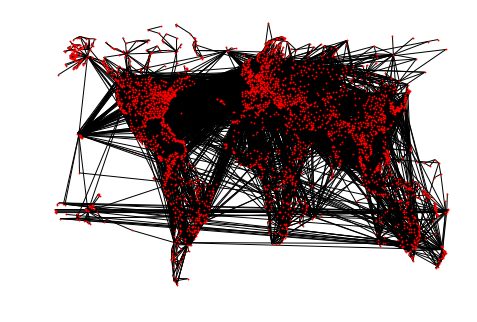

In [43]:
nx.draw(network_main, nx.get_node_attributes(network_main, 'coordinates'), node_shape = '.' , node_size= 3 )
plt.show()

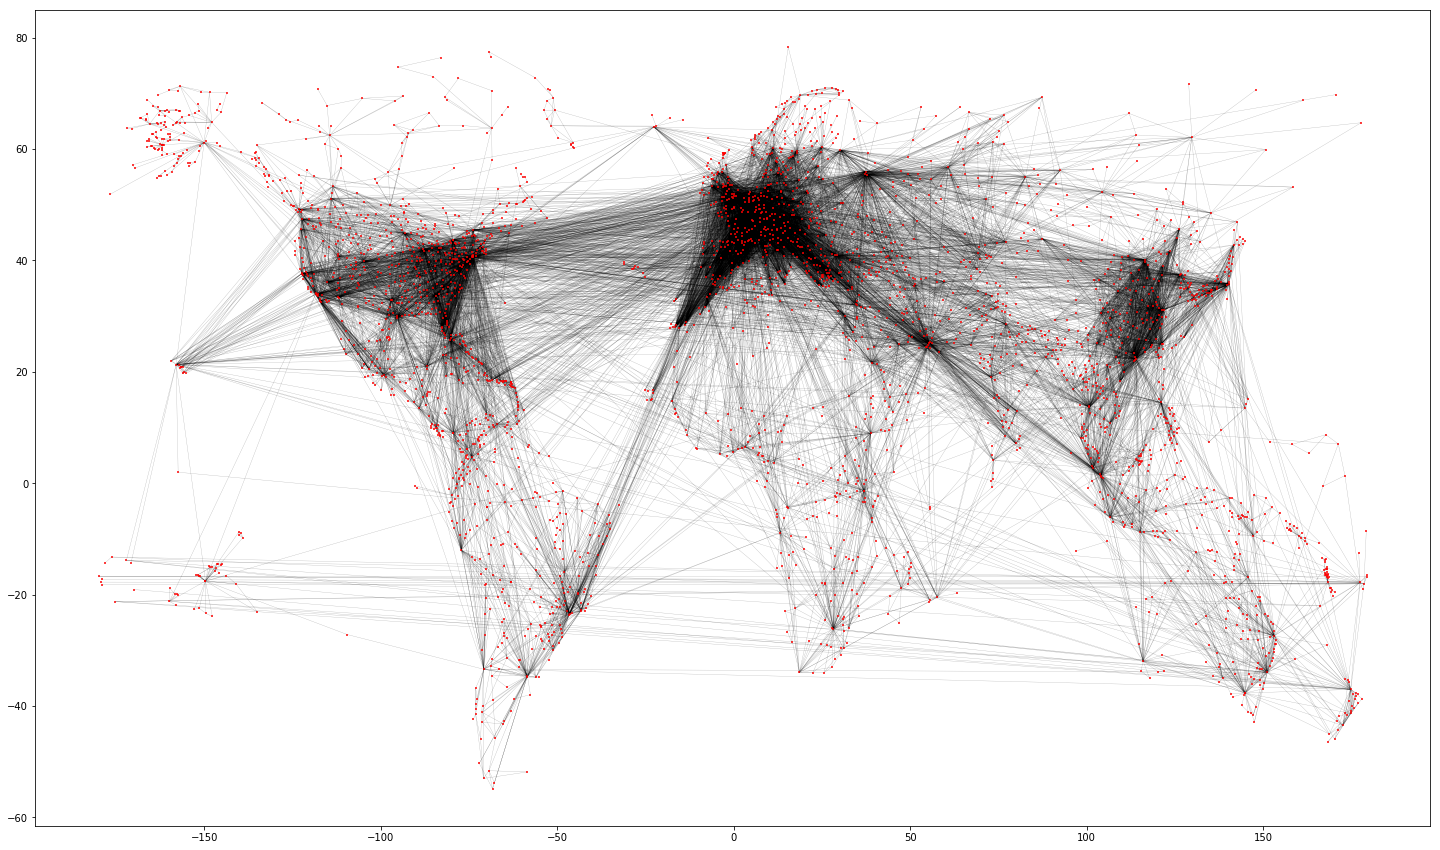

In [78]:
# First, we will need to set the size of the figure to make it a bit bigger; 
#then we will modify the nodes using the function nx.draw_networkx_nodes in which we will set as shape a dot and a size = 6 
# Finally, we will modify the edges using the function .draw_networkx_edges that take as attribute the with of an edge 
#the alpha value (transparency).

plt.figure(figsize = (25, 15))
nx.draw_networkx_nodes(network_main, nx.get_node_attributes(network_main, 'coordinates'), node_shape = '_' , node_size = 8)
nx.draw_networkx_edges(network_main, nx.get_node_attributes(network_main, 'coordinates'), width = 0.3 , alpha = 0.3)
plt.show()

In [48]:
#let’s go a step further, let’s set a different color for nodes in each continent
# blue for Europe, red for Asia, Yellow for Africa etc 
#set the node size based on the centrality values.
# So the higher the centrality of an airport is the bigger the node is. 
#Additionally, let us show the routes Turkish Airlines and US airlines are taking.

maximum_centrality = max(degree_centrality.values())
for airport in network_main.nodes():
    if network_main.nodes[airport]['timezone'].find('Europe') == 0 :
        network_main.nodes[airport]['color'] = 'blue'
    elif network_main.nodes[airport]['timezone'].find('Asia')== 0 :
        network_main.nodes[airports]['color'] = 'red'
    elif network_main.nodes[airport]['timezone'].find('Africa') == 0 :
        network_main.nodes[airport]['color'] = 'yellow'
    elif network_main.nodes[airport]['timezone'].find('America') == 0 :
        network_main.nodes[airport]['color'] = 'green'
    elif network_main.nodes[airport]['timezone'].find('Australia') == 0 :
        network_main.nodes[airport]['color'] = 'orange'
    elif network_main.nodes[airport]['timezone'].find('Pacific') == 0 :
        network_main.nodes[airport]['color'] = 'purple'
    else:
        network_main.nodes[airport]['color'] = 'grey'
                           
    if network_main.nodes[airport]['degree_centrality'] >= maximum_centrality * .9:
        network_main.nodes[airport]['importance'] = 400
    elif network_main.nodes[airport]['degree_centrality'] >= maximum_centrality * .5:
        network_main.nodes[airport]['importance'] = 150
    else:
        network_main.nodes[airport]['importance'] = 10


NameError: name 'airports' is not defined

In [50]:
maximum_centrality = max(degree_centrality.values())
for airport in network_main.nodes():
    if network_main.nodes[airport]['timezone'].find('Europe') == 0 :
        network_main.nodes[airport]['color'] = 'blue'
    elif network_main.nodes[airport]['timezone'].find('Asia')== 0 :
        network_main.nodes[airport]['color'] = 'red'
    elif network_main.nodes[airport]['timezone'].find('Africa') == 0 :
        network_main.nodes[airport]['color'] = 'yellow'
    elif network_main.nodes[airport]['timezone'].find('America') == 0 :
        network_main.nodes[airport]['color'] = 'green'
    elif network_main.nodes[airport]['timezone'].find('Australia') == 0 :
        network_main.nodes[airport]['color'] = 'orange'
    elif network_main.nodes[airport]['timezone'].find('Pacific') == 0 :
        network_main.nodes[airport]['color'] = 'purple'
    else:
        network_main.nodes[airport]['color'] = 'grey'
                           
    if network_main.nodes[airport]['degree_centrality'] >= maximum_centrality * .9:
        network_main.nodes[airport]['importance'] = 400
    elif network_main.nodes[airport]['degree_centrality'] >= maximum_centrality * .5:
        network_main.nodes[airport]['importance'] = 150
    else:
        network_main.nodes[airport]['importance'] = 10

In [81]:
for route in network_main.edges():
    if (network_main[route[0]][route[1]]['airline'] == "TK"):
        network_main[route[0]][route[1]]['color'] = 'red'
        network_main[route[0]][route[1]]['size'] = 1.5
    elif (network_main[route[0]][route[1]]['airline'] == "US"):
        network_main[route[0]][route[1]]['color'] = 'yellow'
        network_main[route[0]][route[1]]['size'] = 1.5
    else:
        network_main[route[0]][route[1]]['color'] = 'purple'
        network_main[route[0]][route[1]]['size'] = 0.2

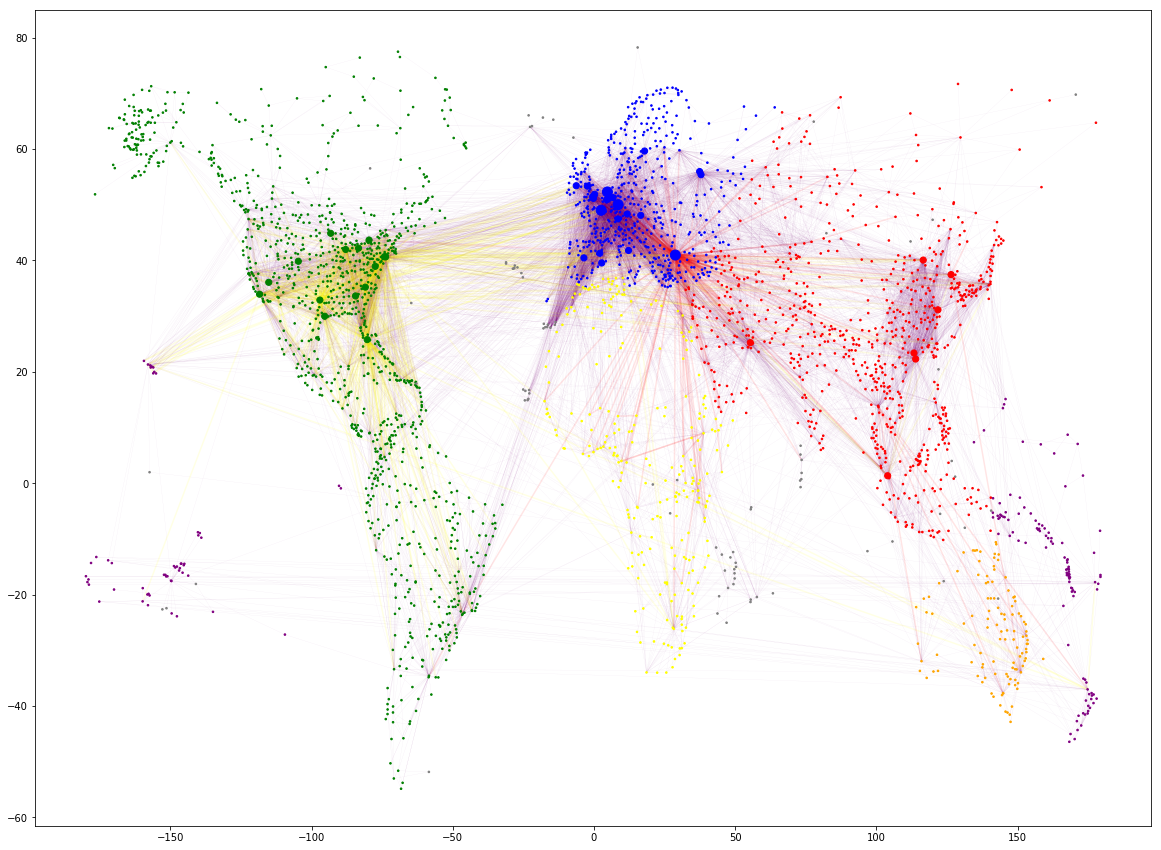

In [82]:
#Once we are done transforming the values, let’s plot them.
plt.figure(figsize = (20, 15))
nx.draw_networkx_nodes(network_main, nx.get_node_attributes(network_main, 'coordinates'), node_shape = '.' , 
                       node_size = [importance for importance in nx.get_node_attributes(network_main, 'importance').values()],
                       node_color = [color for color in nx.get_node_attributes(network_main, 'color').values()])
nx.draw_networkx_edges(network_main, nx.get_node_attributes(network_main, 'coordinates'), 
                       width =[size for size in nx.get_edge_attributes(network_main, 'size').values()],
                       edge_color =[color for color in nx.get_edge_attributes(network_main, 'color').values()],
                       alpha = 0.1)

plt.show()